## Innomatics Internship Task

In [205]:
# Steps to perform
# Step 1: Download the dataset from the link available above. 
# Step 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.
# Step 3: Build a Machine Learning Model to predict output based on the input column.
# Step 4: **Bonus (max weightage) Make sure to apply:
# Proper outlier detection and treatment.
# Feature Engineering
# Hyperparameter Tuning
# Step 5: Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?
# Step 6: **Bonus (max weightage) Build a Linear Regression model by performing appropriate feature engineering.

In [206]:
# Importing the required libraries
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats # Statistics
import warnings
warnings.filterwarnings('ignore')# Avoid warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [207]:
# Importing the data

df = pd.read_csv("dataframe.csv")

In [208]:
# Shape of the dataset
df.shape

(1697, 2)

In [209]:
# Top 5 values of the dataset
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [210]:
# Statistical details of the dataframe
df.describe(include='all')

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [211]:
# Summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


### Handling the missing values and visualizing the dataframe

In [212]:
# Handling the missing values 
df.isnull().sum()

input     1
output    1
dtype: int64

### Observation : Count of the null values is less compared to the size of the dataframe. So, dropping the null values.

In [213]:
# Droppping the null values
df.dropna(inplace=True)

In [214]:
# Checking for the null values after dropping the null values
df.isnull().sum()

input     0
output    0
dtype: int64

In [215]:
df.columns

Index(['input', 'output'], dtype='object')

<AxesSubplot:xlabel='input'>

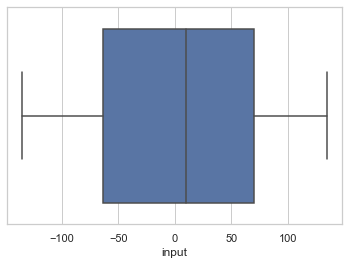

In [216]:
# Outlier Detection 

sns.boxplot(df['input'])

<AxesSubplot:xlabel='output'>

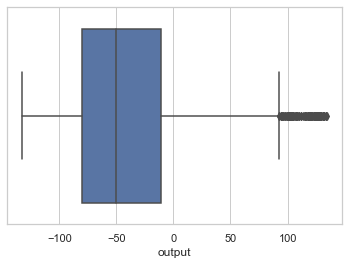

In [217]:
sns.boxplot(df['output'])

In [218]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['input'])

Outliers: []


In [219]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['output'])

Outliers: [100.4931074, 103.8184132, 94.0, 109.9652616, 94.63628875, 101.0, 102.4015316, 107.0, 116.3274991, 107.2929794, 92.92781851, 119.0, 128.4164159, 121.0, 125.120374, 102.8245883, 133.7931158, 129.0, 126.7503849, 132.05527, 126.5373083, 100.9599261, 100.0, 100.0000474, 103.0, 102.0504222, 94.79950464, 103.0, 98.58331448, 99.7648188, 119.5931407, 105.0, 104.7542306, 95.91099282, 117.0, 131.8415952, 101.6377652, 128.5894125, 125.0, 131.9163621, 115.4380488, 127.0, 134.4254952, 115.3676033, 126.0, 127.5743908, 120.0, 103.5618586, 106.8797057, 115.0, 108.4355336, 126.8997443, 125.6857499, 102.0, 107.5450815, 98.04474815, 102.7495195, 104.6792673, 101.0488702, 96.37932413, 95.0, 113.8706782, 104.0, 118.3510094, 107.0, 96.856977, 120.2647247, 111.4769582, 109.0, 108.4806004, 123.148918, 105.6093477, 112.0, 101.023864, 111.9385401, 97.55392008, 118.0, 126.0529894, 129.4342905, 123.6196799, 118.0, 118.5645896, 99.54481995, 129.2721534, 131.0, 132.4248018, 131.0, 131.0, 123.060597, 118.5

### Observation : There were some outliers with in the dataset so by using Imputation treating the outliers.

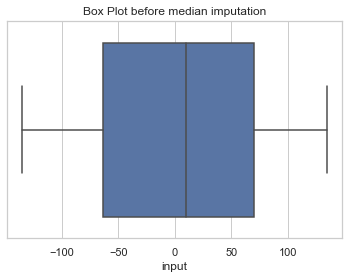

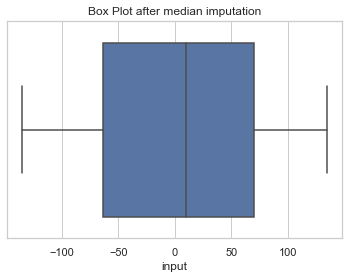

In [220]:
import matplotlib.pyplot as plt
sns.boxplot(df['input'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['input'].quantile(0.25)
q3 = df['input'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['input'])
for i in df['input']:
    if i > Upper_tail or i < Lower_tail:
            df['input'] = df['input'].replace(i, med)
sns.boxplot(df['input'])
plt.title("Box Plot after median imputation")
plt.show() 

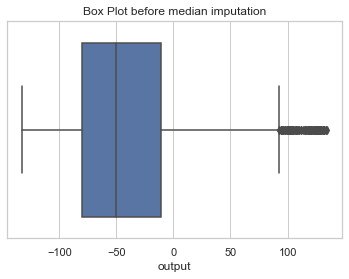

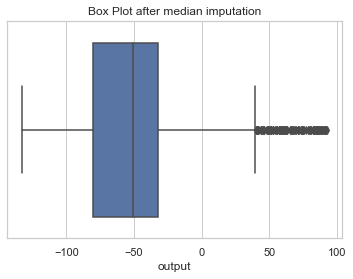

In [221]:
sns.boxplot(df['output'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['output'].quantile(0.25)
q3 = df['output'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['output'])
for i in df['output']:
    if i > Upper_tail or i < Lower_tail:
            df['output'] = df['output'].replace(i, med)
sns.boxplot(df['output'])
plt.title("Box Plot after median imputation")
plt.show()

In [222]:
# Unique values with in the target variable

df['output'].value_counts()

-50.470981     144
-95.000000      32
-33.000000      12
-78.000000      12
-32.000000      10
              ... 
-104.595355      1
-102.423597      1
-85.280049       1
-79.156025       1
 91.338348       1
Name: output, Length: 862, dtype: int64

In [223]:
# Visualizing the dataframe
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


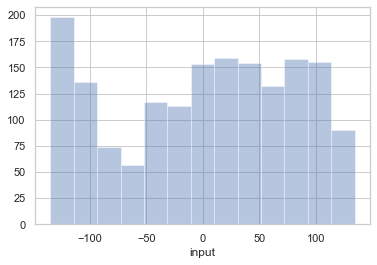

In [224]:
# Distribution Plot of the input column with in the dataframe
sns.distplot(df["input"], kde=False)
plt.show()

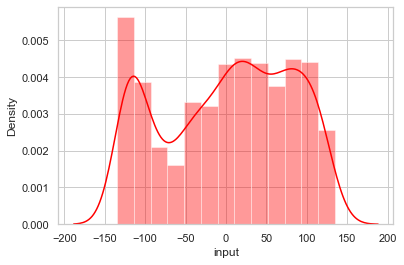

In [225]:
# Distribution plot and kernal destiny estimation plot of the input column
sns.distplot(df["input"], kde=True,color="red")
plt.show()

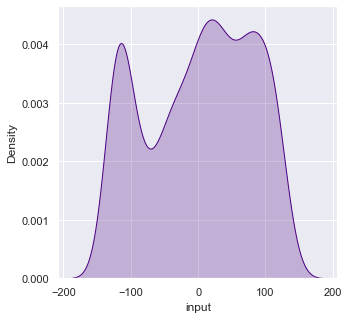

In [226]:
# Kernaml distribution plot to check the density of the input column
sns.set(rc={"figure.figsize":(5,5)})
sns.kdeplot(df["input"],shade=True,color="indigo")
plt.show()

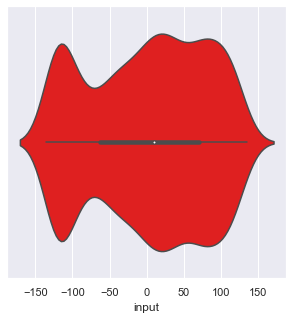

In [227]:
sns.violinplot(df["input"],color="red")
plt.show()

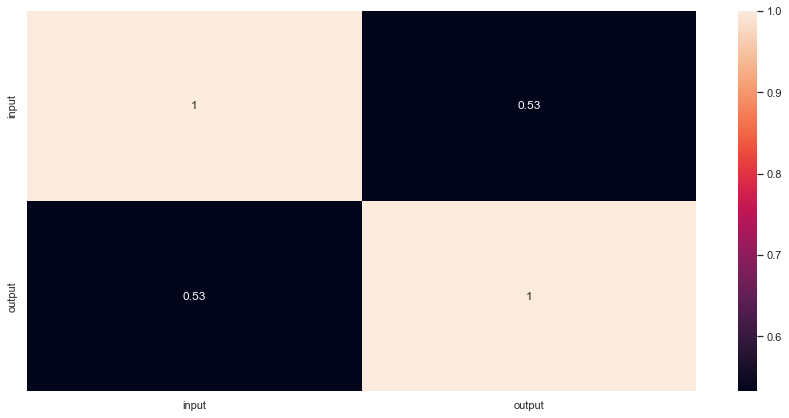

In [228]:
# Heatmap of the dataset
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [229]:
# Scatterplot

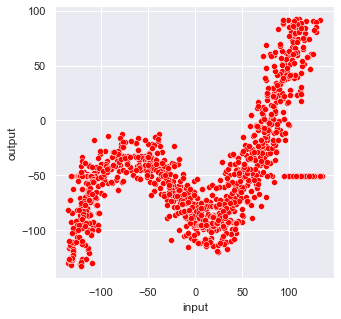

In [230]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df["input"],y=df["output"],color="red")
plt.show()

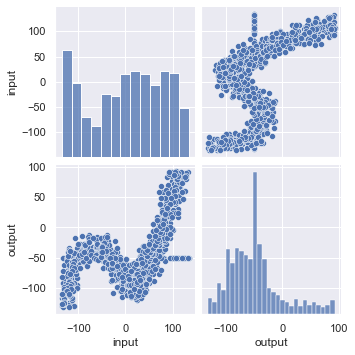

In [231]:
sns.pairplot(data =df, vars=["input","output"])
plt.show()

### Building Machine learning Models 

In [232]:
# Normal Linear Regression

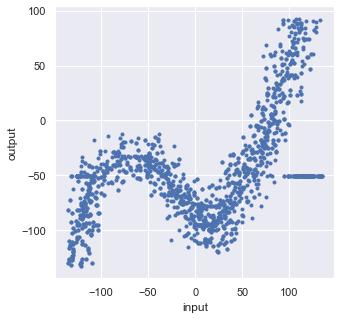

In [233]:
plt.plot(df["input"], df["output"],'b.')
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [234]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(df["input"], df["output"],test_size=0.2)

In [235]:
X_train= X_train.to_numpy()
X_train = X_train.reshape(-1,1)

In [236]:
y_train= y_train.to_numpy()
y_train = y_train.reshape(-1,1)

In [237]:
X_test= X_test.to_numpy()
X_test = X_test.reshape(-1,1)

In [238]:
# Applying linear regression
lr = LinearRegression()

In [239]:
lr.fit(X_train,y_train)

LinearRegression()

In [240]:
y_pred = lr.predict(X_test)
# r2 Score of the Linear Regression 
r2_score(y_test,y_pred)

0.20806003450425414

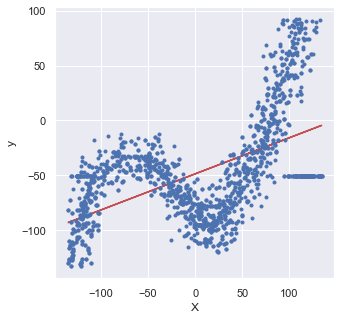

In [241]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot( df["input"], df["output"],"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [242]:
# Polynomial regression

In [243]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=6,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [244]:
print(X_train[0])
print(X_train_trans[0])

[93.94866414]
[1.00000000e+00 9.39486641e+01 8.82635149e+03 8.29223932e+05
 7.79044807e+07 7.31902189e+09 6.87612330e+11]


In [245]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [246]:
y_pred = lr.predict(X_test_trans)

In [247]:
r2_score(y_test,y_pred)

0.6577495859333449

In [248]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.00000000e+00 -5.15443544e-01  1.88912276e-02  1.57390107e-04
  -1.38417211e-06 -6.61017018e-09  1.96818117e-11]]
[-85.14350834]


In [249]:
# Decision Tree resgressor

In [250]:
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)

In [251]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5)

In [252]:
y_pred = rt.predict(X_test)

In [253]:
r2_score(y_test,y_pred)

0.6295744526478875

In [254]:
# Hyperparameter Tuning in Decision tree

In [255]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [256]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [257]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [258]:
# Performance metric of the Decision Tree Regressor
reg.best_score_

0.6022910526074119

In [259]:
reg.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 0.25,
 'min_samples_split': 0.25}

In [260]:
## Random Forest regression

In [261]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [262]:
y_pred = regr.predict(X_test)

In [263]:
r2_score(y_test,y_pred)

0.6572885925423629

In [264]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [265]:
# Hyperparameter tuning in random forest regression

In [266]:
reg = GridSearchCV(RandomForestRegressor(),param_grid=param_grid)

In [267]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [268]:
y_pred = regr.predict(X_test)

In [269]:
r2_score(y_test,y_pred)

0.6572885925423629

In [270]:
reg.best_score_

0.5789824611802683

In [271]:
reg.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 0.25,
 'min_samples_split': 0.25}

In [272]:
## Gradient boosting regression

In [273]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [274]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [275]:
 reg.score(X_test, y_test)

0.6702804416131354

In [276]:
# Hyperparameter tuning in gradient boost regression

In [277]:
reg = GridSearchCV( GradientBoostingRegressor(),param_grid=param_grid)

In [278]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [279]:
y_pred = regr.predict(X_test)

In [280]:
r2_score(y_test,y_pred)

0.6572885925423629

In [281]:
reg.best_score_

0.6688852527327784

In [282]:
reg.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 0.25,
 'min_samples_split': 0.25}

In [283]:
## Adaboost Regression

In [284]:
from sklearn.ensemble import AdaBoostRegressor

In [285]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
AdaBoostRegressor(n_estimators=100, random_state=0)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [286]:
y_pred = rt.predict(X_test)

In [287]:
r2_score(y_test,y_pred)

0.6295744526478875

In [288]:
# Hyperparameter tuning adaboost regressor

In [289]:
param_grid = {
    'n_estimators':[10, 50, 100, 200, 500],
    'learning_rate' : [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]
}

In [290]:
reg = GridSearchCV( AdaBoostRegressor(n_estimators=100),param_grid=param_grid)

In [291]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(n_estimators=100),
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2],
                         'n_estimators': [10, 50, 100, 200, 500]})

In [292]:
y_pred = regr.predict(X_test)

In [293]:
r2_score(y_test,y_pred)

0.6071175839848382

In [294]:
reg.best_score_

0.6154849365979829

In [295]:
reg.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

### Observation : After doing Hyperparamter Tuning Random Forest and Adaboost Regressor are with high accuracy and the best models of the dataset.